# Integración numérica Montecarlo

## Leonardo Rodríguez Hernández 01-04-2024

**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

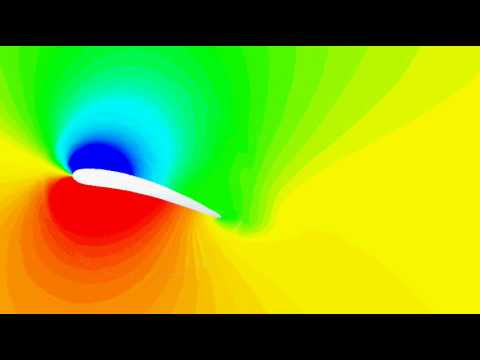

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

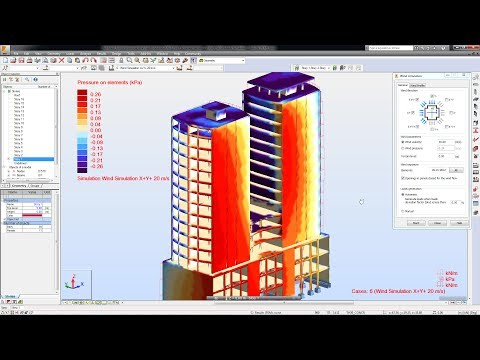

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=(x-2)^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

$$ f(x) $$

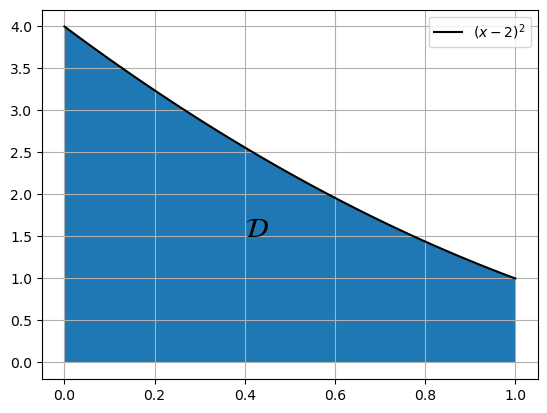

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Graficamos
x = np.linspace(0, 1, 100)
y = (x-2)**2
plt.figure()
plt.plot(x, y, "k", label="$(x-2)^2$")
plt.text(0.4, 1.5, "$\mathcal{D}$", fontsize=20)
plt.fill_between(x, y)
plt.legend(loc="best")
plt.grid()


Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}(x-2)^2\text{d}x.$$

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=(x-2)^2$ es exactamente el valor promedio de $f(x)=(x-2)^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}(u_i-2)^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

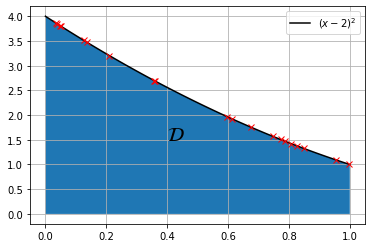

In [7]:
plt.figure()
plt.plot(x, y, "k", label="$(x-2)^2$")
plt.text(0.4, 1.5, "$\mathcal{D}$", fontsize=20)
plt.fill_between(x, y)
plt.legend(loc="best")
plt.grid()

N = 20
u = np.random.rand(N)
plt.plot(u, (u-2)**2, "xr")


**¿Cómo construir vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

In [21]:
def f(x) :
    return (x-2)**2

a=0
b=1
N=10000000

import numpy as np
np.random.seed(2)
u=np.random.uniform(0, 1, N)
y=f(u)

np.mean(y)*(b-a)


2.3333196707272936

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i),$$

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i).$$

In [25]:
def f(x):
    return (x-2)**2
a=0
b=1
N=10000000

import numpy as np
np.random.seed(2)

u=np.random.uniform( a, b, N)
y=f(u)

np.mean(y)*(b-a)

def montecarlo(f, a, b, N):
    u=np.random.uniform(a, b, N)
    y=f(u)
    return np.mean(y)*(b-a)

np.random.seed(105465)
montecarlo(f, a, b, 10)

2.6562845232729964

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

N=[10,100,1000,10000,10000]
tabla=pd.DataFrame(columns=["Aproximación", "error"], index=N)

In [23]:
def fulanito(x):
    return np.exp(x)

def menganito(x):
    return (x-2)**2
def f(x):
    return np.sin(x)

def g(x):
    return np.cos(x)


def montecarlo(f, a, b, N):
    u=np.random.uniform(a, b, N)
    y=f(u)
    return np.mean(y)*(b-a)

In [27]:
tabla.loc[10, "Aproximación"]= montecarlo(menganito, a, b, 10)
tabla.loc[100, "Aproximación"]= montecarlo(menganito, a, b, 100)
tabla.loc[1000, "Aproximación"]= montecarlo(menganito, a, b, 1000)
tabla.loc[10000, "Aproximación"]= montecarlo(menganito, a, b, 10000)
tabla.loc[100000, "Aproximación"]= montecarlo(menganito, a, b, 100000)

tabla.loc[10, "error"]= np.abs(7/3 - tabla.loc[10, "Aproximación"])
tabla.loc[100, "error"]= np.abs(7/3 - tabla.loc[100, "Aproximación"])
tabla.loc[1000, "error"]= np.abs(7/3 - tabla.loc[1000, "Aproximación"])
tabla.loc[10000, "error"]= np.abs(7/3 - tabla.loc[10000, "Aproximación"])
tabla.loc[100000, "error"]= np.abs(7/3 - tabla.loc[100000, "Aproximación"])

tabla

,Aproximación,error
10,2.020409,0.312924
100,2.291272,0.042061
1000,2.310908,0.022426
10000,2.32895,0.004383
10000,2.32895,0.004383
100000,2.331972,0.001361


Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

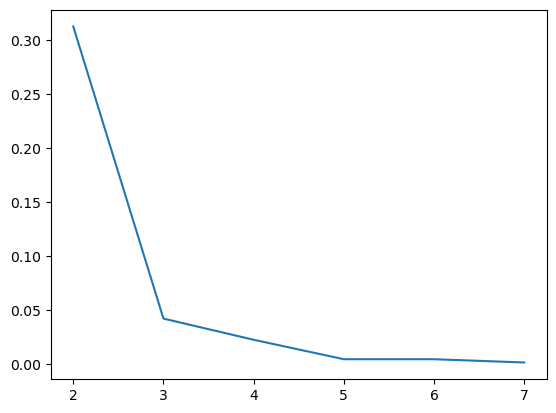

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot([2, 3, 4, 5, 6, 7], tabla["error"])

**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

In [29]:
def f(x):
    return np.exp(x**2)
a=2
b=2.1
N=1000

import numpy as np
np.random.seed(2)

def montecarlo(f, a, b, N):
    u=np.random.uniform(a, b, N)
    y=f(u)
    return np.mean(y)*(b-a)

montecarlo(f, a, b, N)


def g(x):
    return 1/(np.log(x))
a=2
b=2.1
N=1000

import numpy as np
np.random.seed(2)

def montecarlo(g, a, b, N):
    u=np.random.uniform(a, b, N)
    y=f(u)
    return np.mean(y)*(b-a)

montecarlo(g, a, b, N)
N=[10,100,1000,10000,10000]
tabla=pd.DataFrame(columns=["Aproximación1", "error1", "Aproximacion 2", "error2"], index=N)
tabla

,Aproximación1,error1,Aproximacion 2,error2
10,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN


In [30]:
tabla.loc[10, "Aproximación1"]= montecarlo(f, a, b, 10)
tabla.loc[100, "Aproximación1"]= montecarlo(f, a, b, 100)
tabla.loc[1000, "Aproximación1"]= montecarlo(f, a, b, 1000)
tabla.loc[10000, "Aproximación1"]= montecarlo(f, a, b, 10000)
tabla.loc[100000, "Aproximación1"]= montecarlo(f, a, b, 100000)

tabla.loc[10, "error1"]= np.abs(6.73789 - tabla.loc[10, "Aproximación1"])
tabla.loc[100, "error1"]= np.abs(6.73789 - tabla.loc[100, "Aproximación1"])
tabla.loc[1000, "error1"]= np.abs(6.73789 - tabla.loc[1000, "Aproximación1"])
tabla.loc[10000, "error1"]= np.abs(6.73789 - tabla.loc[10000, "Aproximación1"])
tabla.loc[100000, "error1"]= np.abs(6.73789 - tabla.loc[100000, "Aproximación1"])


tabla.loc[10, "Aproximación2"]= montecarlo(f, a, b, 10)
tabla.loc[100, "Aproximación2"]= montecarlo(f, a, b, 100)
tabla.loc[1000, "Aproximación2"]= montecarlo(f, a, b, 1000)
tabla.loc[10000, "Aproximación2"]= montecarlo(f, a, b, 10000)
tabla.loc[100000, "Aproximación2"]= montecarlo(f, a, b, 100000)

tabla.loc[10, "error2"]= np.abs(6.73789 - tabla.loc[10, "Aproximación2"])
tabla.loc[100, "error2"]= np.abs(6.73789 - tabla.loc[100, "Aproximación2"])
tabla.loc[1000, "error2"]= np.abs(6.73789 - tabla.loc[1000, "Aproximación2"])
tabla.loc[10000, "error2"]= np.abs(6.73789 - tabla.loc[10000, "Aproximación2"])
tabla.loc[100000, "error2"]= np.abs(6.73789 - tabla.loc[100000, "Aproximación2"])


tabla

,Aproximación1,error1,Aproximacion 2,error2,Aproximación2
10,6.767074,0.029184,NaN,0.320569,7.058459
100,6.70345,0.03444,NaN,0.11771,6.620180
1000,6.705468,0.032422,NaN,0.020584,6.717306
10000,6.73178,0.00611,NaN,0.004964,6.732926
10000,6.73178,0.00611,NaN,0.004964,6.732926
100000,6.736105,0.001785,NaN,0.000973,6.736917


### Ejercicio puntos extras

Evaluar las 3 funciones con Montecarlo. Sacar el valor correcto de Wolfram. Tener UNA tabla con f1 error f2 error f3 error.

___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

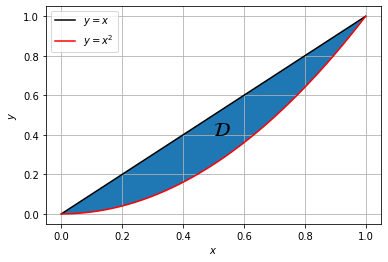

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x) :
    return x
def f2(x) :
    return x**2

x = np.linspace(0, 1, 1000)
plt.plot(x, f1(x), "k", label="$y=x$")
plt.plot(x, f2(x), "r", label="$y=x^2$")
plt.fill_between(x, f1(x), f2(x))
plt.text(0.5, 0.4, "$\mathcal{D}$", fontsize=20)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc="best")
plt.grid()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

In [1]:
import numpy as np 
def montecarlo(f, a, b, n):
    u = np.random.uniform(a,b,n)
    return np.mean(f(u))*(b-a)

In [2]:
def f1(x):
    return x
def f2(x):
    return x**2

montecarlo(f1, 0 , 1, 10000) - montecarlo(f2, 0, 1, 10000)

0.16409926299127903

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

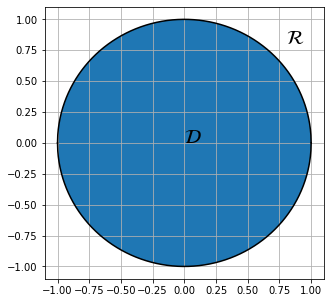

In [27]:
# x**2 + y**2 = r**2
x = np.linspace(-1, 1, 1000)
def circuloS(x) :
    return np.sqrt(1 - x**2)
def circuloI(x) :
    return - np.sqrt(1 - x**2)

plt.figure(figsize=(5, 5))
plt.plot(x, circuloS(x), "k")
plt.plot(x, circuloI(x), "k")
plt.fill_between(x, circuloS(x), circuloI(x))
plt.text(0, 0, "$\mathcal{D}$", fontsize=20)
plt.text(0.8, 0.8, "$\mathcal{R}$", fontsize=20)
plt.grid()


Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

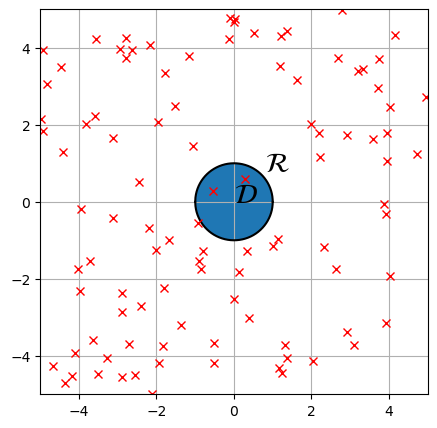

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# x**2 + y**2 = r**2
x = np.linspace(-1, 1, 1000)
def circuloS(x) :
    return np.sqrt(1 - x**2)
def circuloI(x) :
    return - np.sqrt(1 - x**2)

plt.figure(figsize=(5, 5))
plt.plot(x, circuloS(x), "k")
plt.plot(x, circuloI(x), "k")
plt.fill_between(x, circuloS(x), circuloI(x))
plt.text(0, 0, "$\mathcal{D}$", fontsize=20)
plt.text(0.8, 0.8, "$\mathcal{R}$", fontsize=20)
plt.grid()


x1 = np.random.uniform(-5, 5,100)
y1 = np.random.uniform(-5, 5,100)

plt.xlim([-5, 5])
plt.ylim([-5,5])

plt.plot(x1, y1, "xr")

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de $\theta$ se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

De nuevo, comparemos con el valor exacto.

In [5]:
def bernoulli(x, y):
    return x**2 + y**2 <= 1

# esto funciona solamente para esta figura, cada figura son diferentes maneras para saber si cayó o no dentro de su área

In [6]:
N = 100000000

ax= -1
bx= 1

ay= -1
by= 1

X = np.random.uniform(ax,bx,N)
Y = np.random.uniform(ay,by,N)

area = np.mean(bernoulli(X, Y)) * ((by - ay)*(bx - ax))
area


3.14167084

Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [7]:
def montecarlo2(region,ax, bx, ay, by, N):
    X = np.random.uniform(ax, bx, N)
    Y = np.random.uniform(ay, by, N)
    return np.mean(bernoulli(X, Y)) * ((by - ay)*(bx - ax))


In [8]:
montecarlo2(bernoulli, -1 ,1 , -1 , 1, 1000)

3.112

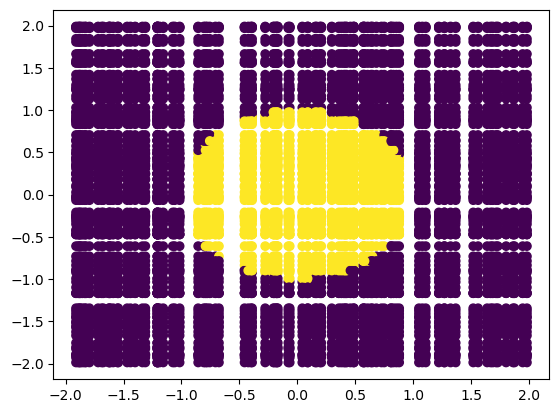

In [9]:
def bernoulli(x, y):
    return x**2 + y**2 <= 1
N = 100
ax = -2
bx = 2
ay = -2
by = 2
X = np.random.uniform(ax, bx, N)
Y = np.random.uniform(ay, by, N)

X, Y = np.meshgrid(X, Y)
plt.scatter(X, Y, c=bernoulli(X,Y))

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

In [16]:
import pandas as pd
import numpy as np
def bernoulli(x, y):
    return 4*(2*x-1)**4+8*(2*y-1)**8 < 1+2*(2*y-1)**3*(3*x-2)**2
i = 1
N = 10
lista = []
while i <= 5:
    ax = -2
    bx = 2
    ay = -2
    by = 2
    lista.append(montecarlo2(bernoulli, ax, bx, ay, by, N))
    i = i + 1
    N = N*10

lista
df = pd.DataFrame(columns=["Términos", "Aprox"])
df

,Términos,Aprox


In [17]:
df["Términos"] = [10, 100, 1000, 10000, 100000]
df["Aprox"] = lista
df

,Términos,Aprox
0,10,0.00000
1,100,0.80000
2,1000,0.52800
3,10000,0.49600
4,100000,0.55104


In [19]:
N = [10, 100, 1000, 10000, 100000]
lista = []
for n in N :
    lista.append(montecarlo2(bernoulli, ax, bx, ay, by, n))

In [20]:
lista

[3.2, 0.48, 0.48, 0.5568, 0.54928]

___
## Error de aproximación de integrales por montecarlo
Ver [documento mit](https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf), página 5.